In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    


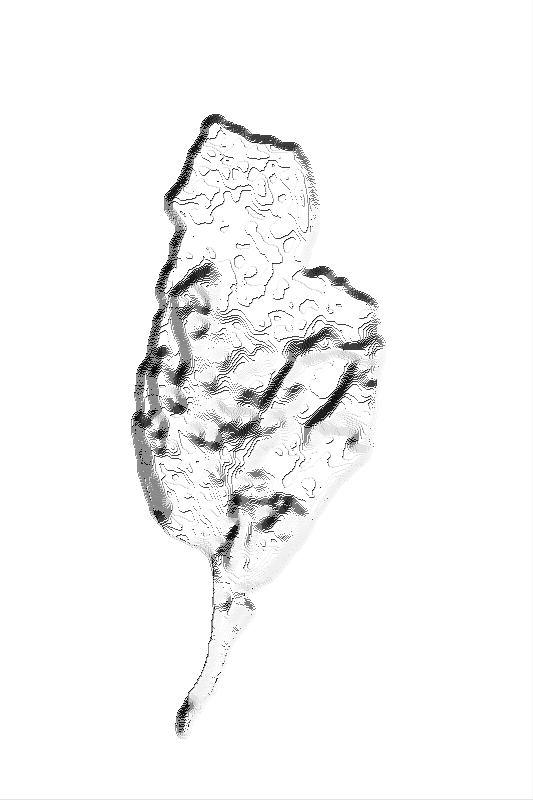

In [0]:
read_path = 'drive/My Drive/Dataset/Bacterial Spot/Extracted Image/extract25.png'
#for file in os.listdir(read_path):
#img_bgr = cv2.imread(os.path.join(read_path,file))
img_bgr=cv2.imread(read_path)
height, width,channel= img_bgr.shape
#hsv_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
#img_h, img_s, img_v = hsv_img[:, :, 0], hsv_img[:, :, 1], hsv_img[:, :, 2]
img_ = cv2.bilateralFilter(img_h,11,17,17)
#img_gray=cv2.bilateralFilter(img_h,11,17,17)
img_lbp = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
  for j in range(0, width):
	  #img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    img_lbp[i, j] = lbp_calculated_pixel(img_h, i, j)

cv2_imshow(img_lbp)
#path = 'drive/My Drive/Dataset/Features/Bacterial Spot'
#cv2.imwrite(os.path.join(path , file),img_lbp)


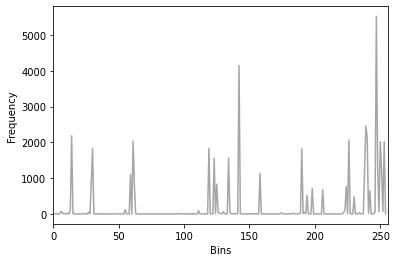

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import os
from numpy import savetxt,loadtxt
from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d

#img=cv2.imread('drive/My Drive/review 2/bspot_CLBP_S.png')
hist=cv2.calcHist([img_lbp],[0],None,[255],[1,255])
plt.plot(hist,color='gray',alpha = 0.7)
plt.xlim([0,256])
		#plt.ylim([0,2500])
		#plt.fill(hist_b, alpha = 0.5)
		#plt.ylim([0,4000])
plt.xlabel('Bins')
plt.ylabel('Frequency')
		#plt.title('Grayscale histogram of a CLBP_S/M')
		# ax2.plot(hist_h)

plt.show()